In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
original_mu = np.array([1,1])
original_sigma = 0.1 * np.eye(2)
rv = multivariate_normal(original_mu, original_sigma)

In [3]:
def h_p(x):
    return 1 - (np.tanh(x)*np.tanh(x))

In [4]:
h_p(0.5)

0.7864477329659274

In [6]:
rv.pdf([1,1.5]), np.log(rv.pdf([1,1.5]))

(0.45598654639838576, -0.7852919734153001)

Hyperplane: 0x + -1y = -1
F Invertible: True


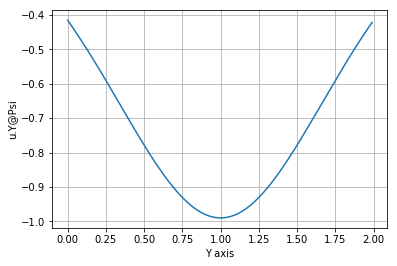

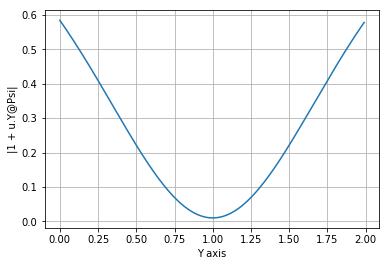

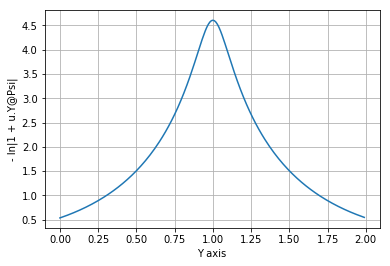

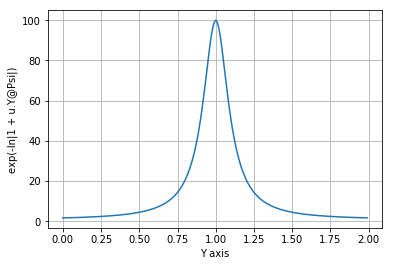

In [47]:
w = np.array([0, -1])
b = 1
u = np.array([0.99,0.99])

print('Hyperplane: {}x + {}y = -{}'.format(w[0],w[1],b))
print('F Invertible: {}'.format(w@u.T >= -1))

def upsi(z0):
    def h_p(x):
        return 1 - (np.tanh(x)*np.tanh(x))
    return u@(h_p(w@z0.T+b)*(w.T)).T

y = np.arange(0,2,1e-2)
z = np.zeros((y.size,2))
z[:,1] = y.reshape(-1,1)[:,0]
psi = np.zeros(y.size)
for i in range(len(psi)):
    psi[i] = upsi(z[i])

# Plot
fig = plt.figure()
ax = fig.gca()
ax.set_xlabel('Y axis')
ax.set_ylabel('u.Y@Psi')
ax.grid()
ax.plot(y, psi)

fig = plt.figure()
ax = fig.gca()
ax.set_xlabel('Y axis')
ax.set_ylabel('|1 + u.Y@Psi|')
ax.grid()
ax.plot(y, np.abs(1 + psi))

fig = plt.figure()
ax = fig.gca()
ax.set_xlabel('Y axis')
ax.set_ylabel('- ln|1 + u.Y@Psi|')
ax.grid()
ax.plot(y, - np.log(np.abs(1 + psi)))

fig = plt.figure()
ax = fig.gca()
ax.set_xlabel('Y axis')
ax.set_ylabel('exp(-ln|1 + u.Y@Psi|)')
ax.grid()
ax.plot(y, np.exp(-np.log(np.abs(1 + psi))))

plt.show()

In [28]:
np.log(0.0001)

-9.210340371976182